### Гендерная классификация

Гендер — это социальная конструкция. То, как по-разному относятся к мальчикам и девочкам с рождения, формирует их поведение и личные предпочтения в соответствии с тем, что общество ожидает от их пола.
## Постановка задачи

Этот небольшой набор данных предназначен для того, чтобы дать представление о том, можно ли предсказать пол человека с точностью значительно выше 50% на основе его личных предпочтений.

### Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Загрузка данных

In [2]:
df = pd.read_csv('Transformed Data Set - Sheet.csv')

In [5]:
# Просматриваем наш файл 

In [237]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


#### Описание данных

Признаки:


- Favorite Color – Любимый цвет
- Favorite Music Genre	 – Любимый жанр музыки
- Favorite Beverage	 – Любимая выпивка
- Favorite Soft Drink – Любимый напиток/газировка

Целевой (искомый) признак:
- Gender – Гендер

In [241]:
# Количество данных 
df.shape

(106, 5)

### 1. Предобработка данных

In [7]:
# информация о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        106 non-null    object
 1   Favorite Music Genre  106 non-null    object
 2   Favorite Beverage     106 non-null    object
 3   Favorite Soft Drink   106 non-null    object
 4   Gender                106 non-null    object
dtypes: object(5)
memory usage: 4.3+ KB


In [246]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,106,106,106,106,106
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,54,24,22,52,65


В целом анамальных значений не обнаружено, он является полностью заполненым, только со строковым типом данных.

In [249]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке Favorite Color = 0
Кол-во пропусков в колонке Favorite Music Genre = 0
Кол-во пропусков в колонке Favorite Beverage = 0
Кол-во пропусков в колонке Favorite Soft Drink = 0
Кол-во пропусков в колонке Gender = 0


In [9]:
# Проверка на дублирование записей
df.duplicated().sum()

9

In [253]:
df['Favorite Color'].value_counts()

Favorite Color
Cool       54
Warm       32
Neutral    20
Name: count, dtype: int64

In [255]:
df['Favorite Music Genre'].value_counts()

Favorite Music Genre
Rock                24
Pop                 22
Electronic          16
Hip hop             15
R&B and soul        15
Folk/Traditional     8
Jazz/Blues           6
Name: count, dtype: int64

In [257]:
df['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    22
Beer             22
Vodka            17
Wine             17
Whiskey          14
Other            14
Name: count, dtype: int64

In [259]:
df['Favorite Soft Drink'].value_counts()

Favorite Soft Drink
Coca Cola/Pepsi    52
7UP/Sprite         23
Fanta              21
Other              10
Name: count, dtype: int64

In [261]:
df['Gender'].value_counts()

Gender
F    65
M    41
Name: count, dtype: int64

In [35]:
# Удалить дубликаты, показать строки  
duplicates = df[df.duplicated(keep=False)]
duplicates

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
6,Cool,Pop,Beer,Coca Cola/Pepsi,F
17,Cool,Rock,Other,Coca Cola/Pepsi,F
18,Cool,Rock,Other,Coca Cola/Pepsi,F
22,Cool,Rock,Vodka,Coca Cola/Pepsi,F
25,Warm,R&B and soul,Whiskey,Coca Cola/Pepsi,F
29,Cool,Electronic,Doesn't drink,Fanta,F
31,Neutral,Rock,Beer,Coca Cola/Pepsi,F
32,Cool,R&B and soul,Beer,Coca Cola/Pepsi,F
40,Cool,Rock,Vodka,Coca Cola/Pepsi,M


### Вывод


Вывели дубликаты, но после тщательного просмотра, вынесли вердикт о том, что при таком маленьком датасете, 
не имеет смысла удалять дубликаты.

### 2. Визуальный анализ

<Axes: ylabel='proportion'>

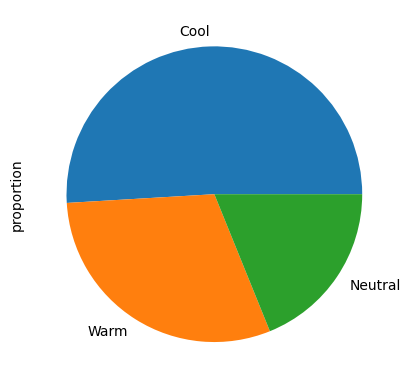

In [38]:
df['Favorite Color'].value_counts(normalize=True).plot.pie()

<Axes: ylabel='proportion'>

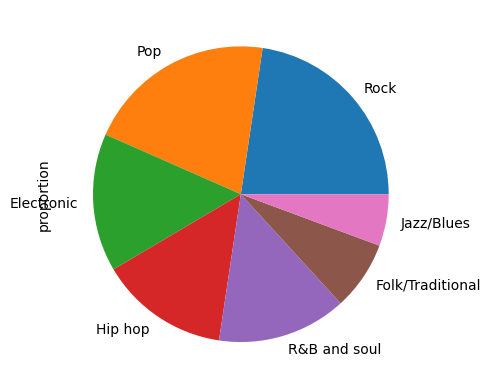

In [270]:
df['Favorite Music Genre'].value_counts(normalize=True).plot.pie()

<Axes: ylabel='proportion'>

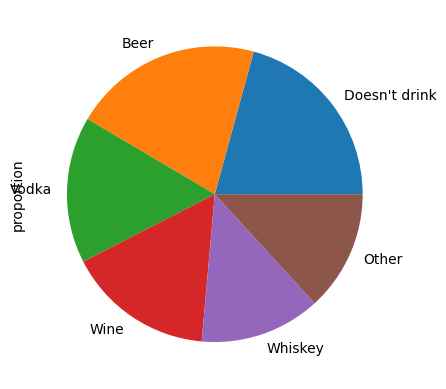

In [272]:
df['Favorite Beverage'].value_counts(normalize=True).plot.pie()

<Axes: ylabel='proportion'>

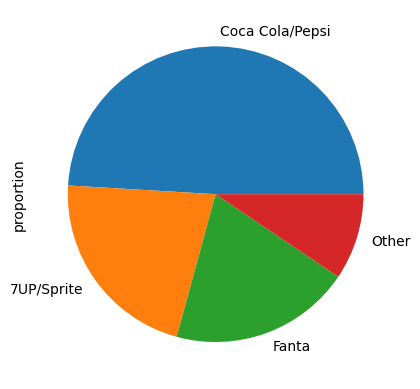

In [274]:
df['Favorite Soft Drink'].value_counts(normalize=True).plot.pie()

In [40]:
df['Gender']=df['Gender'].replace('F', '0')
df['Gender']=df['Gender'].replace('M', '1')
df['Gender'].value_counts()

Gender
0    65
1    41
Name: count, dtype: int64

<Axes: xlabel='Gender'>

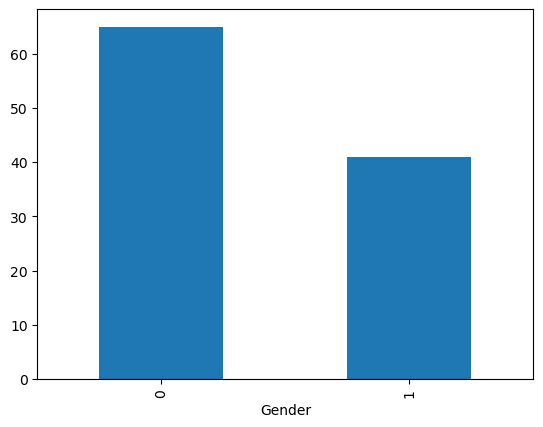

In [42]:
df['Gender'].value_counts(normalize=False).plot.bar()

In [44]:
Favorite_Color = {'Cool': 1, 'Warm': 2, 'Neutral': 3}
df['Favorite Color'] = df['Favorite Color'].replace(Favorite_Color)

In [46]:
Favorite_Music_Genre = {'Rock': 1, 'Pop': 2, 'Hip hop': 3, 'Electronic': 4, 'R&B and soul': 5, 'Folk/Traditional': 6, 'Jazz/Blues': 7}
df['Favorite Music Genre'] = df['Favorite Music Genre'].replace(Favorite_Music_Genre)

In [48]:
Favorite_Soft_Drink = {'Coca Cola/Pepsi':1,'Fanta':2,'7UP/Sprite':3,'Other':4}
df['Favorite Soft Drink']= df['Favorite Soft Drink'].replace(Favorite_Soft_Drink)

In [50]:
Favorite_Beverage = {"Doesn't drink": 1, 'Beer': 2, 'Other': 3, 'Wine': 4, 'Vodka': 5, 'Whiskey': 6}
df['Favorite Beverage'] = df['Favorite Beverage'].replace(Favorite_Beverage)

In [52]:
df.head(10)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,1,1,5,3,0
1,3,3,5,1,0
2,2,1,4,1,0
3,2,6,6,2,0
4,1,1,5,1,0
5,2,7,1,2,0
6,1,2,2,1,0
7,2,2,6,2,0
8,2,1,3,3,0
9,3,2,4,1,0


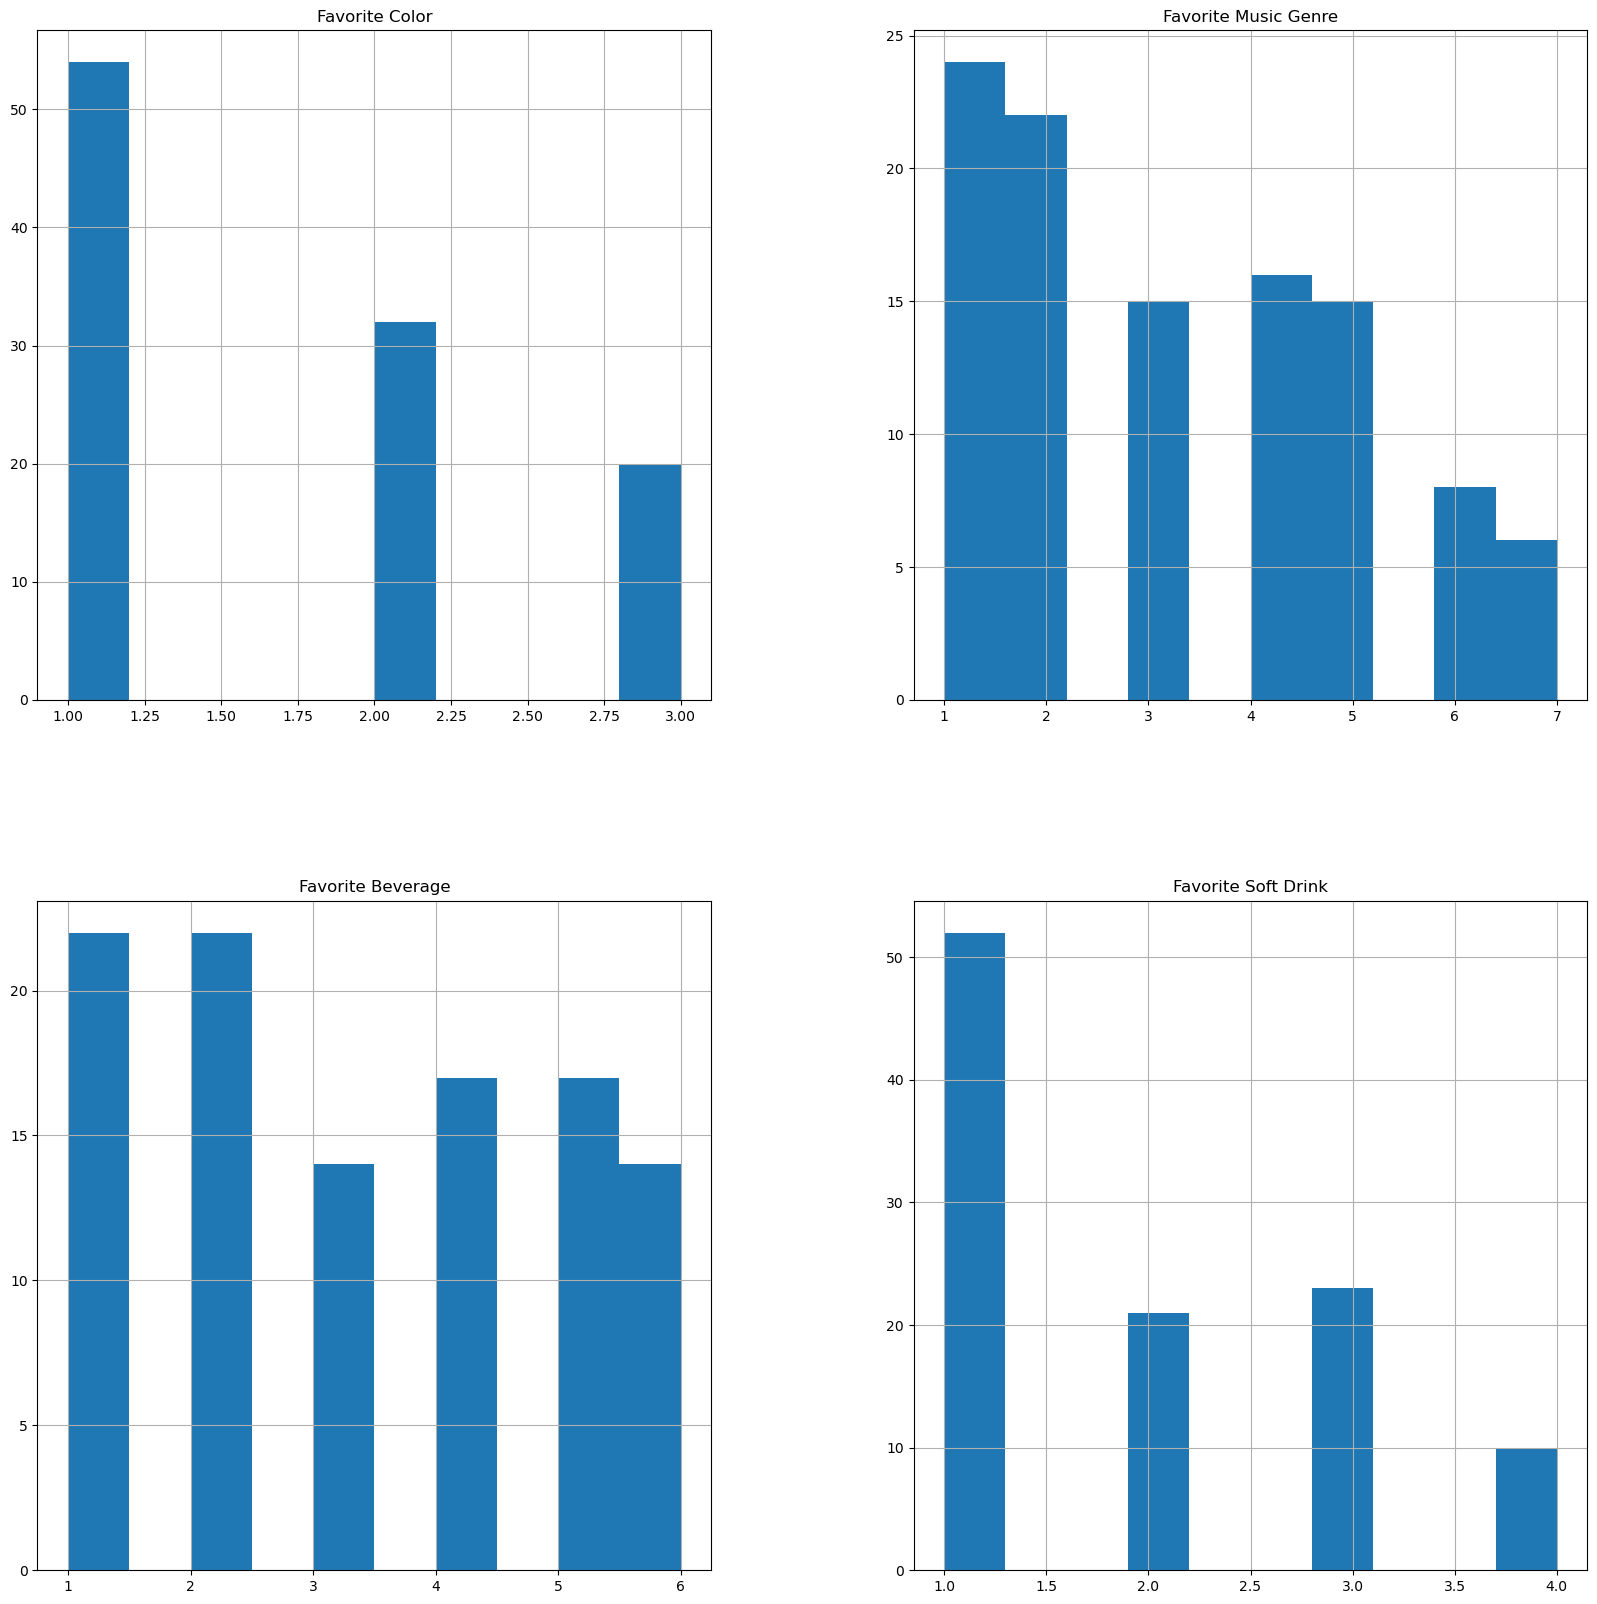

In [290]:
df.hist(figsize=(20,20));

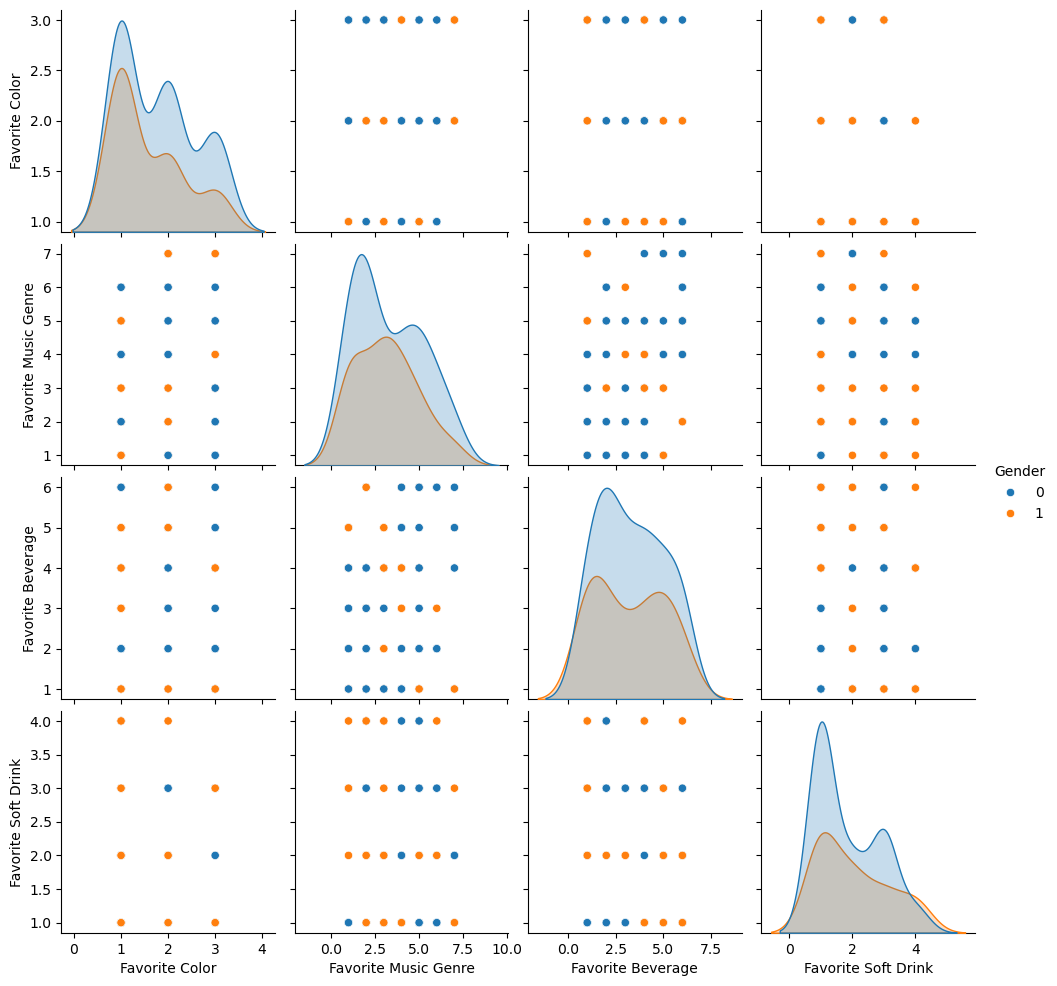

In [292]:
sns.pairplot(df[['Favorite Color','Favorite Music Genre','Favorite Beverage','Favorite Soft Drink', "Gender"]], hue = 'Gender')

К сожалению зависимости не наблюдается.

In [54]:
corr = df[['Gender','Favorite Soft Drink','Favorite Beverage','Favorite Music Genre','Favorite Color']].corr()
corr

,Gender,Favorite Soft Drink,Favorite Beverage,Favorite Music Genre,Favorite Color
Gender,1.000000,0.083616,-0.027495,-0.034674,-0.121749
Favorite Soft Drink,0.083616,1.000000,-0.035409,0.034871,-0.092897
Favorite Beverage,-0.027495,-0.035409,1.000000,0.035518,-0.087651
Favorite Music Genre,-0.034674,0.034871,0.035518,1.000000,0.111327
Favorite Color,-0.121749,-0.092897,-0.087651,0.111327,1.000000


<Axes: >

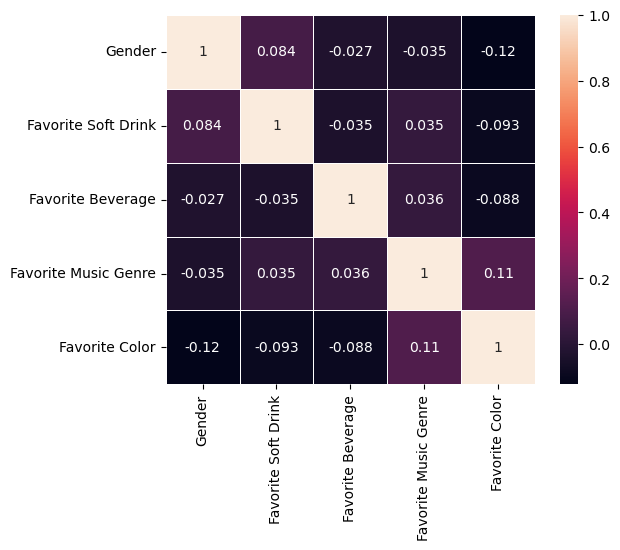

In [56]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

### 3. Обучение классификатора

### Формирование дата-сета для обучения моделей

In [58]:
# список имён признаков, которые будут использоваться для построения модели
column_names = ['Favorite Soft Drink','Favorite Beverage','Favorite Music Genre','Favorite Color']

In [60]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[column_names]], axis = 1)
X.shape

(106, 4)

In [62]:
X.head()

,Favorite Soft Drink,Favorite Beverage,Favorite Music Genre,Favorite Color
0,3,5,1,1
1,1,5,3,3
2,1,4,1,2
3,2,6,6,2
4,1,5,1,1


In [175]:
# выделение целевой переменной в отдельный вектор
y = df['Gender']

### Создание моделей

In [177]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [179]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(71, 4) (35, 4) (71,) (35,)


In [181]:
from sklearn.metrics import accuracy_score

### KNeighborsClassifier (Классификация ближайших соседей)

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 2.1 ms


KNeighborsClassifier()

In [188]:
# Предугадываем тренировочную выборку 
knn.predict(X_test)

array(['1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '0'], dtype=object)

In [190]:
# измерение производительности
y_train_predict = knn.predict(X_train) 
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.676056338028169
test accuracy:  0.4857142857142857


In [192]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)

### Вывод:

Этот метод плохо подходит для данного датасета, определив ближайших соседей, можно сказать что не смотря на разный пол люди с похожими вкусами могут быть разных полов. 

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [194]:
from sklearn.naive_bayes import GaussianNB

In [196]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 3.16 ms


GaussianNB()

In [198]:
# измерение производительности
gnb_y_train_predict = gnb.predict(X_train)
gnb_y_test_predict = gnb.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, gnb_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gnb_y_test_predict, normalize=True))

train accuracy:  0.5915492957746479
test accuracy:  0.6571428571428571


In [226]:
gnb_accuracy = accuracy_score(y_test, gnb_y_test_predict)

### Вывод:

Этот классификатор справился лучше остальных на тестовой части, интересно то, что на тренировочной части он справился лучше чем в тестовой. 
Он справился лучше т.к наш датасет имеет не зависимые признаки, но при этом не совсем распределен равномерно.

### Random Forest Classifier (Классификатор дерева решений)

In [228]:
from sklearn.ensemble import RandomForestClassifier

In [230]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 219 ms
Wall time: 157 ms


In [232]:
rfc_y_train_predict = rfc.predict(X_train)
rfc_y_test_predict = rfc.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, rfc_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_y_test_predict, normalize=True))

train accuracy:  0.9436619718309859
test accuracy:  0.42857142857142855


In [234]:
rfc_accuracy = accuracy_score(y_test, rfc_y_test_predict)

### Вывод:

Этот метод не подходит для данного датасета, в первом случае Классификатор дерева решений переучился запомнив данные и справился хорошо, но с тествой частью он справился плохо. Видимо это из-за того что между данными не было взаимвосвязей.

### Logistic Regression (Логистическая регрессия)

In [236]:
from sklearn.linear_model import LogisticRegression

In [238]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [240]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 2.99 ms


LogisticRegression(random_state=42)

In [242]:
# performance measurement
from sklearn.metrics import accuracy_score
lr_y_train_predict = lr.predict(X_train)
lr_y_test_predict = lr.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, lr_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, lr_y_test_predict, normalize=True))

train accuracy:  0.6197183098591549
test accuracy:  0.5714285714285714


In [244]:
lr_accuracy = accuracy_score(y_test, lr_y_test_predict)

### Вывод:

Этот метод справился чутка похуже чем Gaussian Naive Bayes, скорее всего, какая то часть одного пола с одними и теми же интересами преобладает, и на основе этих данных классификатор набрал больше баллов.

## Метрики классификации, оценка моделей

In [246]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [248]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]

In [250]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.485714
1,Gaussian Naive Bayes,0.657143
2,Random Forest Classifier,0.428571
3,Logistic Regression,0.571429


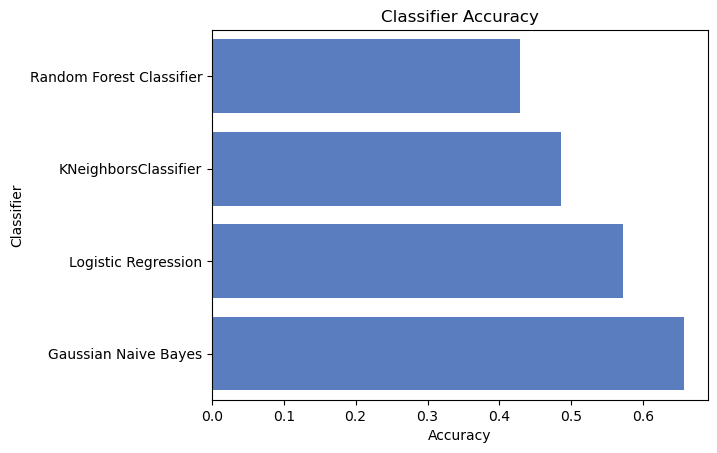

In [252]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

### F1-score

**F1-score** - это гармоническое среднее между precision и recall. Она учитывает оба этих параметра и находит некоторый баланс между ними.

__Precision (точность)__ показывает, какая доля объектов, отнесенных моделью к некоторому классу, действительно принадлежит этому классу.
Precision показывает, какая доля предсказанных положительных примеров действительно является положительными. Это важно в задачах, где ложноположительные ошибки могут быть дорогостоящими, например, в медицинской диагностике.

**Recall (полнота)** показывает, какую долю объектов некоторого класса из всех объектов этого класса нашла модель.
Recall измеряет, какую долю реальных положительных примеров модель смогла правильно предсказать. Это важно в задачах, где пропуск положительных примеров может быть критичным, например, в обнаружении мошенничества.

In [254]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [256]:
print('test f1_score: ', f1_score(y_test, y_test_predict, pos_label='1'))

test f1_score:  0.18181818181818182


In [258]:
print('test f1_score: ', f1_score(y_test, gnb_y_test_predict, pos_label='1'))

test f1_score:  0.14285714285714285


In [260]:
print('test f1_score: ', f1_score(y_test, rfc_y_test_predict, pos_label='1'))

test f1_score:  0.0


In [262]:
print('test f1_score: ', f1_score(y_test, lr_y_test_predict, pos_label='1'))

test f1_score:  0.0


In [264]:
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        23
           1       0.20      0.17      0.18        12

    accuracy                           0.49        35
   macro avg       0.40      0.41      0.40        35
weighted avg       0.46      0.49      0.47        35



In [266]:
print(classification_report( y_test, gnb_y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        23
           1       0.50      0.08      0.14        12

    accuracy                           0.66        35
   macro avg       0.58      0.52      0.46        35
weighted avg       0.61      0.66      0.57        35



In [268]:
print(classification_report( y_test, rfc_y_test_predict))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60        23
           1       0.00      0.00      0.00        12

    accuracy                           0.43        35
   macro avg       0.28      0.33      0.30        35
weighted avg       0.37      0.43      0.39        35



In [270]:
print(classification_report( y_test, lr_y_test_predict))

              precision    recall  f1-score   support

           0       0.62      0.87      0.73        23
           1       0.00      0.00      0.00        12

    accuracy                           0.57        35
   macro avg       0.31      0.43      0.36        35
weighted avg       0.41      0.57      0.48        35



### Кроссвалидация

In [272]:
X = df[['Favorite Soft Drink','Favorite Beverage','Favorite Music Genre','Favorite Color']]      

In [274]:
y = df['Gender']

In [276]:
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

In [278]:
# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.54545455 0.52380952 0.47619048 0.28571429 0.38095238]
Mean cross-validation score:  0.4424242424242424


### Настройка гиперпараметров Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [280]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [282]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [288]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [289]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [292]:
gs_NB.best_score_

0.619047619047619

In [294]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

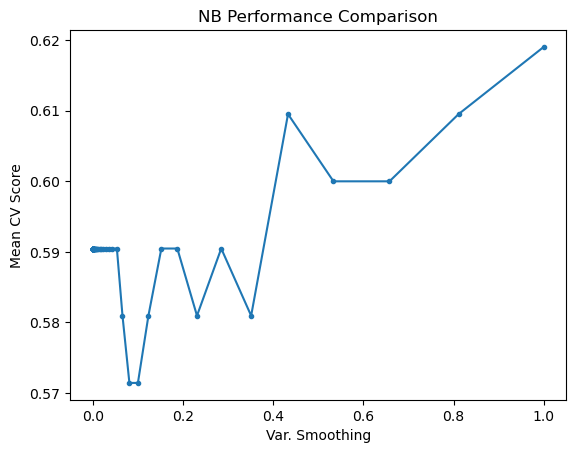

In [296]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")

plt.show()

In [301]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.6857142857142857


### Общий вывод
Лучше всего себя показал метод: Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР), он хорошо справляется с бинарными признаками, и хорошо ведет себя с данными которые не взаимосвязаны. Именно поэтому он справился лучше всех.